# Housing Prices

* Goal: Predict the sale price of a house
* Resources: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=train.csv

In [1]:
#import required libraries
import pandas as pd
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv(r"C:\Users\wyman\OneDrive\Desktop\Python Projects\House Prices\train (1).csv")
test = pd.read_csv(r"C:\Users\wyman\OneDrive\Desktop\Python Projects\House Prices\test (1).csv")

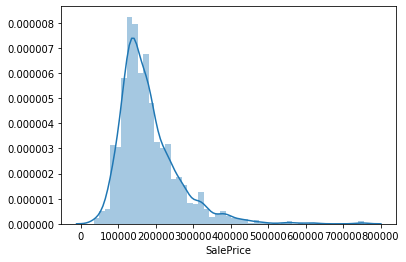

In [3]:
sns.distplot(train['SalePrice'])

Since the distribution is skewed to the right, we can apply a log(1+x) transformation to fix the skewness of the data.

In [4]:
from scipy.stats import norm

In [5]:
train['SalePrice'] = np.log1p(train['SalePrice'])
test['SalePrice'] = np.log1p(train['SalePrice'])

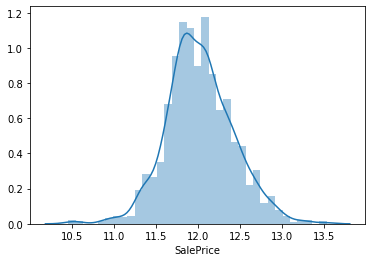

In [6]:
sns.distplot(train['SalePrice'])

Great! Our data now looks more normalized. 

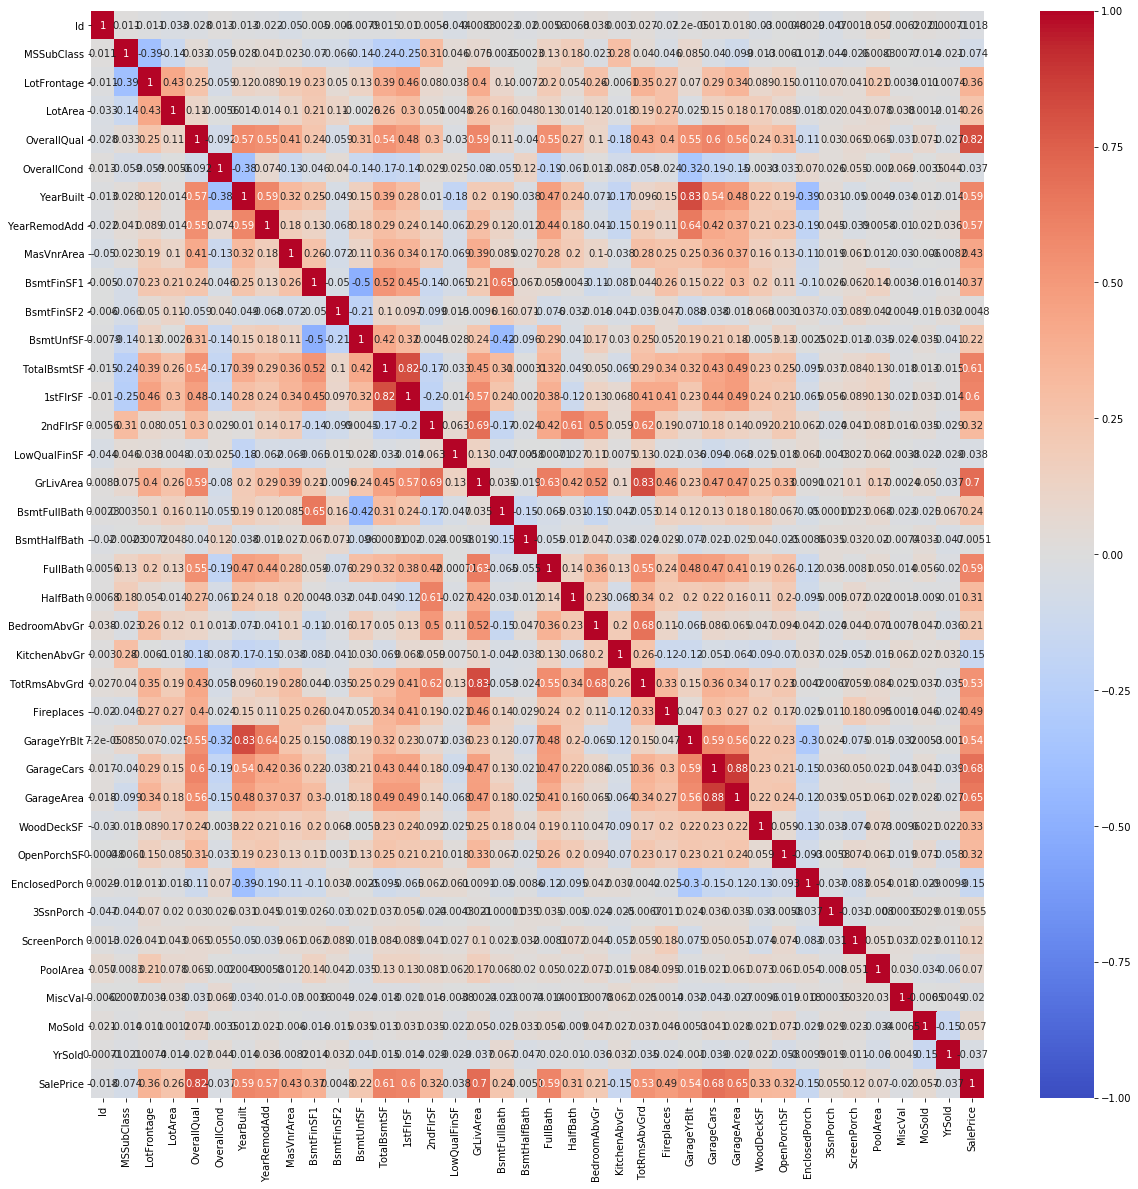

In [7]:
corr_matrix = train.corr()
plt.subplots(figsize = (20,20))
sns.heatmap(corr_matrix, annot = True, fmt='.2g', vmin = -1, vmax = 1, center = 0, cmap = 'coolwarm')

In [8]:
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,2.583824
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,2.573300
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,2.589054
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,2.553297
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,2.597433


In [9]:
#Remove Outliers


In [10]:
#Box-Cox transformation normalizes data. Therefore we can run a broader number of tests.

In [11]:
train.isna().sum().sort_values(ascending = False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
TotalBsmtSF         0
Id                  0
Length: 81, dtype: int64

In [12]:
len(train)

1460

In [13]:
dfs = [train, test]
for df in dfs:
    df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis = 1, inplace = True)

In [14]:
train.isna().sum().sort_values(ascending = False).head(10)

FireplaceQu     690
LotFrontage     259
GarageYrBlt      81
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
BsmtExposure     38
BsmtFinType2     38
BsmtFinType1     37
dtype: int64

In [15]:
for df in dfs:
    df.loc[df['Fireplaces'] == 0, 'FireplaceQu'] = 0

In [16]:
median = train['LotFrontage'].median()

In [17]:
#determine to fill with zero or with mean
train[train['LotFrontage'].isna()]['LotArea']

7       10382
12      12968
14      10920
16      11241
24       8246
        ...  
1429    12546
1431     4928
1441     4426
1443     8854
1446    26142
Name: LotArea, Length: 259, dtype: int64

In [18]:
min(train['LotFrontage'])

21.0

In [19]:
for df in dfs:
    df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace = True)

In [20]:
garage_str = ['GarageType', 'GarageFinish', 'GarageCond', 'GarageQual']

In [21]:
for i in garage_str:
    train[i].fillna('No Garage', inplace = True)
    test[i].fillna('No Garage', inplace = True)

In [22]:
for df in dfs:
    df['GarageYrBlt'].fillna(0, inplace = True)

In [23]:
basement_cols = ['BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtFinType1', 'BsmtCond']
for i in basement_cols:
    train[i].fillna('No Basement', inplace = True)
    test[i].fillna('No Basement', inplace = True)

In [24]:
for df in dfs:
    train['MasVnrType'].fillna('None', inplace = True)
    test['MasVnrType'].fillna('None', inplace = True)
    train['MasVnrArea'].fillna(0, inplace = True)
    test['MasVnrArea'].fillna(0, inplace = True)

In [25]:
for df in dfs:
    train['Electrical'].fillna('None', inplace = True)
    test['Electrical'].fillna('None', inplace = True)

In [26]:
test.isna().sum().sort_values(ascending = False).head(20)

MSZoning        4
Functional      2
BsmtFullBath    2
BsmtHalfBath    2
Utilities       2
GarageArea      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
Exterior2nd     1
Exterior1st     1
KitchenQual     1
GarageCars      1
BsmtFinSF1      1
SaleType        1
Condition1      0
Neighborhood    0
BsmtExposure    0
MSSubClass      0
LotFrontage     0
dtype: int64

In [27]:
numeric_cols = ['BsmtFullBath', 'BsmtHalfBath', 'GarageArea', 'BsmtFinSF2', 'BsmtUnfSF', 'GarageCars', 'TotalBsmtSF', 'BsmtFinSF1']
str_cols = ['MSZoning', 'Functional', 'Utilities', 'SaleType', 'Exterior2nd', 'Exterior1st', 'KitchenQual']

In [28]:
for i in numeric_cols:
    test[i].fillna('0', inplace = True)

for i in str_cols:
    test[i].fillna('None', inplace = True)

Our data now has no missing values so we can proceed with some visualizations

In [29]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,12.429220


## Add columns for increased model accuracy

In [30]:
#train['# Bathrooms'] = train.apply(lambda x: x['BsmtFullBath'] + x['BsmtHalfBath'] + x['FullBath'] + x['HalfBath'], axis = 1)
#test['# Bathrooms'] = train.apply(lambda x: x['BsmtFullBath'] + x['BsmtHalfBath'] + x['FullBath'] + x['HalfBath'], axis = 1)

In [31]:
#train['Has Fireplace'] = train['Fireplaces'] != 0
#test['Has Fireplace'] = test['Fireplaces'] != 0

In [32]:
#train['Has Garage'] = train['GarageQual'] != 'No Garage'
#test['Has Garage'] = test['GarageQual'] != 'No Garage'

In [34]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,# Bathrooms,Has Fireplace,Has Garage
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,2,2008,WD,Normal,12.247699,4,False,True
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,5,2007,WD,Normal,12.109016,3,True,True
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,9,2008,WD,Normal,12.317171,4,True,True
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,2,2006,WD,Abnorml,11.849405,2,True,True
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,12,2008,WD,Normal,12.429220,4,True,True


## Data

In [35]:
y = train['SalePrice']

In [36]:
train.drop('SalePrice', axis = 1, inplace = True)

In [37]:
df = pd.get_dummies(pd.concat([train, test]))

In [63]:
train_df = df[:1460]
test_df = df[1460:]

In [64]:
X_train = train_df
X_test = test_df

In [65]:
X_train.head(5)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,1stFlrSF,...,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,856,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,1262,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,920,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,961,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,1145,...,0,0,0,1,0,0,0,0,1,0


In [66]:
X_test.head(5)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,1stFlrSF,...,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,896,...,0,0,0,1,0,0,0,0,1,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,1329,...,0,0,0,1,0,0,0,0,1,0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,928,...,0,0,0,1,0,0,0,0,1,0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,926,...,0,0,0,1,0,0,0,0,1,0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,1280,...,0,0,0,1,0,0,0,0,1,0


## Models

In [67]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
#from lightgbm import LGBMRegressor
from sklearn.metrics import accuracy_score

In [68]:
ids = test['Id']

In [69]:
#fp = r'D:\Data Science\Housing Prices\submissions\''

### RandomForestRegressor: 0.41852

In [70]:
rfc = RandomForestRegressor(random_state = 42)

In [71]:
rfc.fit(X_train, y)
y_pred = rfc.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
def to_submission(y_pred):
    df = pd.DataFrame(ids)
    df['SalePrice'] = y_pred
    df.set_index('Id', inplace = True)
    return df

In [ ]:
rfr_df = to_submission(y_pred)

In [ ]:
#rfr_df.to_csv(r'D:\Data Science\Housing Prices\submissions\rfr.csv')

### XGBRegressor: 0.41711

In [ ]:
xgb = XGBRegressor()

In [ ]:
xgb.fit(X_train.values, y)

In [ ]:
y_pred = xgb.predict(X_test.values)

In [ ]:
xgb_df = to_submission(y_pred)

In [ ]:
xgb_df.to_csv(r'C:\Users\wyman\OneDrive\Desktop\Python Projects\House Prices\submissions\xgb.csv')

### Gradient Boosting: 0.13843

In [ ]:
gb = GradientBoostingRegressor()

In [ ]:
param_grid = {
    'n_estimators': [10, 100, 500],
    'warm_start': [False, True],
    'learning_rate': [0.1, 0.2]
    
}

In [ ]:
#CV = GridSearchCV(estimator = gb, param_grid = param_grid)

In [ ]:
#CV.fit(X_train, y)

In [ ]:
#CV.best_params_

In [ ]:
gb = GradientBoostingRegressor(n_estimators = 500)
gb.fit(X_train, y)

In [ ]:
y_pred = gb.predict(X_test)

In [ ]:
y_pred

In [ ]:
gb_df = to_submission(y_pred)

In [ ]:
#gb_df.to_csv(fp + 'gb.csv')

In [ ]:
gb_df.to_csv(r'C:\Users\wyman\OneDrive\Desktop\Python Projects\House Prices\submissions\gb.csv')

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

In [ ]:
features = pd.Series(gb.feature_importances_, index = X_train.columns)
features.nlargest(20).plot(kind = 'barh')
plt.show()